In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
spaceship = pd.read_csv('/content/drive/MyDrive/DATA/UCI/spaceship_tt.csv')

In [4]:
spaceship

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [5]:
spaceship = spaceship.drop(['PassengerId','Name'], axis=1)

- target변수 : Transported

In [6]:
spaceship

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


## 범주형 자료 교차분석

In [7]:
from scipy.stats import chi2_contingency
pd.crosstab(spaceship['HomePlanet'],spaceship['Transported'],margins=True)

Transported,False,True,All
HomePlanet,,,
Earth,2651,1951,4602
Europa,727,1404,2131
Mars,839,920,1759
All,4217,4275,8492


In [8]:
HP_crosstab = pd.crosstab(spaceship['HomePlanet'],spaceship['Transported'],margins=True)
result = chi2_contingency(observed=HP_crosstab, correction=False)
print("1. 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])

1. 카이제곱 통계량: 324.9013834000381
2. p-value: 3.752500845971594e-67


- 귀무가설 : 두 데이터의 상관관계가 없다.
- 대립가설 : 두 데이터의 상관관계가 있다.
- p-vale > 0.05보다 크다 귀무가설 기각 X
- 두 데이터 간의 상관간계 없다.

In [9]:
pd.crosstab(spaceship['CryoSleep'],spaceship['Transported'],margins=True)

Transported,False,True,All
CryoSleep,,,
False,3650,1789,5439
True,554,2483,3037
All,4204,4272,8476


In [10]:
cry_crosstab = pd.crosstab(spaceship['CryoSleep'],spaceship['Transported'],margins=True)
result = chi2_contingency(observed=cry_crosstab, correction=False)
print("1. 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])

1. 카이제곱 통계량: 1861.566975176388
2. p-value: 0.0


- 귀무가설 : 두 데이터의 상관관계가 없다.
- 대립가설 : 두 데이터의 상관관계가 있다.
- p-vale > 0.05보다 크다 귀무가설 기각 X
- 그러나 p-value 값이 0이 나온 것은 거의 발생하지 않는다는 의미를 가지지만 통계적 검정에서 p-value가 0인 경우 해당 검정 통계량이 극단적으로 크거나 작아서 귀무가설이 매우 강력하게 기각되는 상황을 나타낸다.
- 따라서 p-value가 0인 경우에는 귀무가설이 완전히 기각되고 대립가설을 지지하는 것으로 간주
- 두 데이터의 상관관계가 있다고 판단

In [11]:
pd.crosstab(spaceship['Cabin'],spaceship['Transported'],margins=True)

Transported,False,True,All
Cabin,,,
A/0/P,1,1,2
A/0/S,2,0,2
A/1/S,0,3,3
A/10/P,1,0,1
A/10/S,0,1,1
...,...,...,...
T/1/P,1,0,1
T/2/P,1,0,1
T/2/S,1,0,1


In [12]:
cabin_crosstab = pd.crosstab(spaceship['Cabin'],spaceship['Transported'],margins=True)
result = chi2_contingency(observed=cabin_crosstab, correction=False)
print("1. 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])

1. 카이제곱 통계량: 6849.936214884503
2. p-value: 1.0


- 귀무가설 : 두 데이터의 상관관계가 없다.
- 대립가설 : 두 데이터의 상관관계가 있다.
- p-vale > 0.05보다 크다 귀무가설 기각 X
- 두 데이터 간의 상관간계 없다.

In [13]:
pd.crosstab(spaceship['Destination'],spaceship['Transported'],margins=True)

Transported,False,True,All
Destination,,,
55 Cancri e,702,1098,1800
PSO J318.5-22,395,401,796
TRAPPIST-1e,3128,2787,5915
All,4225,4286,8511


In [14]:
dest_crosstab = pd.crosstab(spaceship['Destination'],spaceship['Transported'],margins=True)
result = chi2_contingency(observed=dest_crosstab, correction=False)
print("1. 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])

1. 카이제곱 통계량: 106.39215684982227
2. p-value: 1.1595520411683388e-20


- 귀무가설 : 두 데이터의 상관관계가 없다.
- 대립가설 : 두 데이터의 상관관계가 있다.
- p-vale > 0.05보다 크다 귀무가설 기각 X
- 두 데이터 간의 상관간계 없다.

In [15]:
pd.crosstab(spaceship['VIP'],spaceship['Transported'],margins=True)

Transported,False,True,All
VIP,,,
False,4093,4198,8291
True,123,76,199
All,4216,4274,8490


In [16]:
vip_crosstab = pd.crosstab(spaceship['VIP'],spaceship['Transported'],margins=True)
result = chi2_contingency(observed=vip_crosstab, correction=False)
print("1. 카이제곱 통계량:", result[0])
print("2. p-value:", result[1])

1. 카이제곱 통계량: 12.034588466793494
2. p-value: 0.017095901432754586


- 귀무가설 : 두 데이터의 상관관계가 없다.
- 대립가설 : 두 데이터의 상관관계가 있다.
- p-vale > 0.05보다 작다. 귀무가설 기각
- 두 데이터 간의 상관간계 있다.

#### HomePlanet, Cabin, Destination은 Transported와 상관관계가 적은 데이터로 분석에서 제외
#### CryoSleep과 VIP 범주형 데이터만 사용

In [17]:
ss_new = spaceship.drop(['HomePlanet','Cabin','Destination'],axis=1)
ss_new

/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  output = repr(obj)
/usr/local/lib/python3.10/dist-packages/google/colab/_interactive_table_hint_button.py:162: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  df_html=dataframe._repr_html_(),


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True
...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,True
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False


## 수치형 자료 상관관계 분석

In [18]:
spaceship.corr()

<ipython-input-18-330f3dd350c3>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  spaceship.corr()


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.068723,0.130421,0.033133,0.123970,0.101007,-0.075026
RoomService,0.068723,1.000000,-0.015889,0.054480,0.010080,-0.019581,-0.244611
FoodCourt,0.130421,-0.015889,1.000000,-0.014228,0.221891,0.227995,0.046566
ShoppingMall,0.033133,0.054480,-0.014228,1.000000,0.013879,-0.007322,0.010141
Spa,0.123970,0.010080,0.221891,0.013879,1.000000,0.153821,-0.221131
VRDeck,0.101007,-0.019581,0.227995,-0.007322,0.153821,1.000000,-0.207075
Transported,-0.075026,-0.244611,0.046566,0.010141,-0.221131,-0.207075,1.000000


<ipython-input-19-9fa5a76ea8ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=spaceship.corr(),annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')


<Axes: >

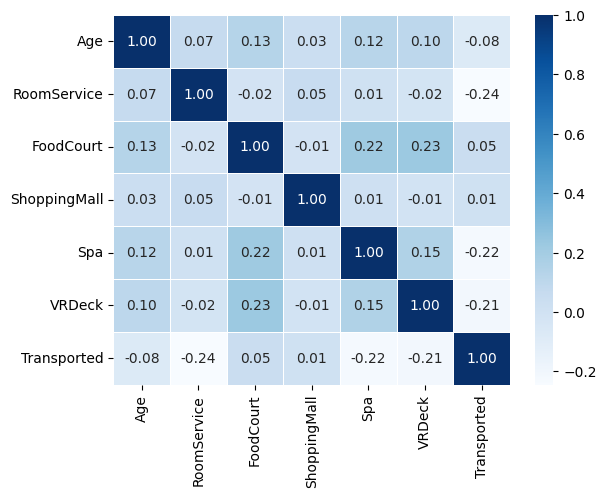

In [19]:
sns.heatmap(data=spaceship.corr(),annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

- 수치형 자료에서 상관관계가 높은 데이터는 FoodCourt, ShoppingMall이다, 음수값이 나온 데이터는 상관관계가 낮아보인다.

### 결측치 확인

In [20]:
ss_new.isnull().sum()

CryoSleep       217
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Transported       0
dtype: int64

- 범주형 자료인 CryoSleep, VIP의 결측치 함부로 제거할 수 없음
- 수치형 자료의 결측치는 결측치 앞의 값으로 대체

In [21]:
ss_new = ss_new.fillna(method='ffill')

In [22]:
ss_new.isnull().sum()

CryoSleep       0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Transported     0
dtype: int64

## 범주형 자료 CryoSleep, VIP 원핫인코딩

In [23]:
ex = ss_new[['CryoSleep','VIP','Transported']]
ex

,CryoSleep,VIP,Transported
0,False,False,False
1,False,False,True
2,False,True,False
3,False,False,False
4,False,False,True
...,...,...,...
8688,False,True,False
8689,True,False,False
8690,False,False,True
8691,False,False,False


In [24]:
cs = pd.get_dummies(ex, columns=['CryoSleep'])
cs = cs.drop(['VIP','Transported'],axis=1)
cs

,CryoSleep_False,CryoSleep_True
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
8688,1,0
8689,0,1
8690,1,0
8691,1,0


In [25]:
vip = pd.get_dummies(ex, columns=['VIP'])
vip = vip.drop(['CryoSleep','Transported'],axis=1)
vip

,VIP_False,VIP_True
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
8688,0,1
8689,1,0
8690,1,0
8691,1,0


In [26]:
trans = pd.get_dummies(ex, columns=['Transported'])
trans = trans.drop(['CryoSleep','VIP'],axis=1)
trans

,Transported_False,Transported_True
0,1,0
1,0,1
2,1,0
3,1,0
4,0,1
...,...,...
8688,1,0
8689,1,0
8690,0,1
8691,1,0


In [27]:
ss_new = pd.concat([ss_new, cs, vip, trans],axis=1)
ss_new

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CryoSleep_False,CryoSleep_True,VIP_False,VIP_True,Transported_False,Transported_True
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0,1,0,1,0
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,0,1,0,0,1
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1,0,0,1,1,0
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1,0,1,0,1,0
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,1,0,0,1,1,0
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False,0,1,1,0,1,0
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,1,0,1,0,0,1
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,1,0,1,0,1,0


In [28]:
ss_new.isnull().sum()

CryoSleep            0
Age                  0
VIP                  0
RoomService          0
FoodCourt            0
ShoppingMall         0
Spa                  0
VRDeck               0
Transported          0
CryoSleep_False      0
CryoSleep_True       0
VIP_False            0
VIP_True             0
Transported_False    0
Transported_True     0
dtype: int64

## 수치형 자료 피처 스케일링

- 데이터 분포 보기

In [29]:
print('feature들의 평균 값')
print(ss_new.mean())
print('\nfeature들의 분산 값')
print(ss_new.var())

feature들의 평균 값
CryoSleep              0.357874
Age                   28.814448
VIP                    0.023467
RoomService          224.358909
FoodCourt            459.524215
ShoppingMall         171.978834
Spa                  311.027723
VRDeck               304.271713
Transported            0.503624
CryoSleep_False        0.642126
CryoSleep_True         0.357874
VIP_False              0.976533
VIP_True               0.023467
Transported_False      0.496376
Transported_True       0.503624
dtype: float64

feature들의 분산 값
CryoSleep            2.298267e-01
Age                  2.101221e+02
VIP                  2.291909e-02
RoomService          4.398267e+05
FoodCourt            2.596356e+06
ShoppingMall         3.586632e+05
Spa                  1.289211e+06
VRDeck               1.319872e+06
Transported          2.500156e-01
CryoSleep_False      2.298267e-01
CryoSleep_True       2.298267e-01
VIP_False            2.291909e-02
VIP_True             2.291909e-02
Transported_False    2.500156e-0

<ipython-input-30-cd978e521815>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ss_new['Age'], ax=ax[0,0])
<ipython-input-30-cd978e521815>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ss_new['RoomService'], ax=ax[0,1])
<ipython-input-30-cd978e521815>:5: UserWarning: 

`distplot` is a deprec

<Axes: xlabel='VRDeck', ylabel='Density'>

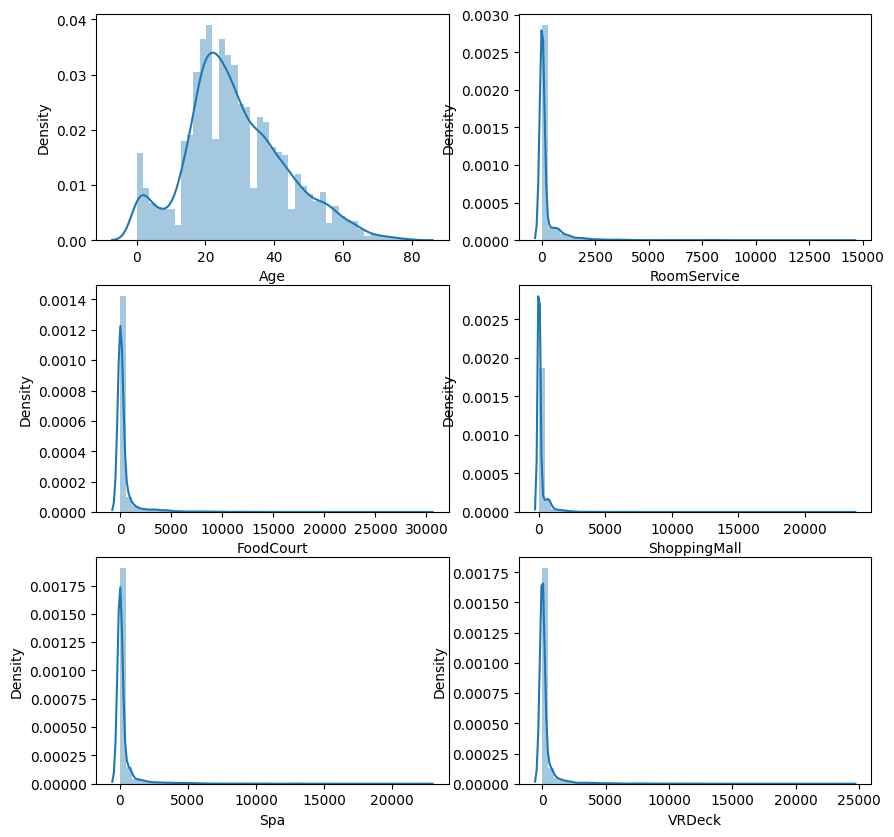

In [30]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(10,10))

sns.distplot(ss_new['Age'], ax=ax[0,0])
sns.distplot(ss_new['RoomService'], ax=ax[0,1])
sns.distplot(ss_new['FoodCourt'], ax=ax[1,0])
sns.distplot(ss_new['ShoppingMall'], ax=ax[1,1])
sns.distplot(ss_new['Spa'], ax=ax[2,0])
sns.distplot(ss_new['VRDeck'], ax=ax[2,1])

In [31]:
print('Age의 왜도 값 : ' , ss_new['Age'].skew())
print('RoomService의 왜도 값 : ' , ss_new['RoomService'].skew())
print('FoodCourt의 왜도 값 : ' , ss_new['FoodCourt'].skew())
print('ShoppingMall의 왜도 값 : ' , ss_new['ShoppingMall'].skew())
print('Spa의 왜도 값 : ' , ss_new['Spa'].skew())
print('VRDeck의 왜도 값 : ' , ss_new['VRDeck'].skew())

Age의 왜도 값 :  0.42002813240203046
RoomService의 왜도 값 :  6.322580172375518
FoodCourt의 왜도 값 :  7.051722763194497
ShoppingMall의 왜도 값 :  12.700450511239456
Spa의 왜도 값 :  7.614215594094643
VRDeck의 왜도 값 :  7.820924217677524


- 데이터 모두 왜도를 갖는다 (모두 왼쪽으로 치우쳐짐), 단 Age 컬럼의 경우 정규분포와 유사하다.
- 데이터 모두 첨도를 갖는다 (모두 심하게 뾰족한 그래프를 갖고 있음)

<ipython-input-32-333e04f825a4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ss_new['CryoSleep_False'], ax=ax[0,0])
<ipython-input-32-333e04f825a4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ss_new['CryoSleep_True'], ax=ax[0,1])
<ipython-input-32-333e04f825a4>:5: UserWarning: 

`distpl

<Axes: xlabel='Transported_True', ylabel='Density'>

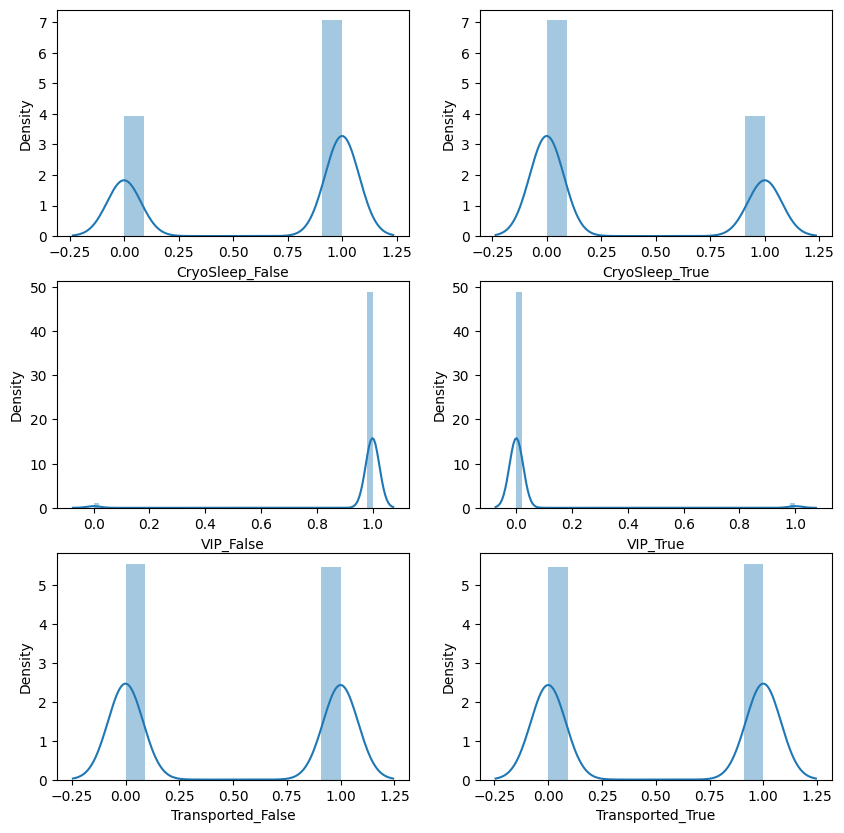

In [32]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(10,10))

sns.distplot(ss_new['CryoSleep_False'], ax=ax[0,0])
sns.distplot(ss_new['CryoSleep_True'], ax=ax[0,1])
sns.distplot(ss_new['VIP_False'], ax=ax[1,0])
sns.distplot(ss_new['VIP_True'], ax=ax[1,1])
sns.distplot(ss_new['Transported_False'], ax=ax[2,0])
sns.distplot(ss_new['Transported_True'], ax=ax[2,1])

In [33]:
print('CryoSleep_False의 왜도 값 : ' , ss_new['CryoSleep_False'].skew())
print('CryoSleep_True의 왜도 값 : ' , ss_new['CryoSleep_True'].skew())
print('VIP_False의 왜도 값 : ' , ss_new['VIP_False'].skew())
print('VIP_True의 왜도 값 : ' , ss_new['VIP_True'].skew())
print('Transported_False의 왜도 값 : ' , ss_new['Transported'].skew())
print('Transported_True의 왜도 값 : ' , ss_new['Transported'].skew())

CryoSleep_False의 왜도 값 :  -0.5930656524499193
CryoSleep_True의 왜도 값 :  0.5930656524499188
VIP_False의 왜도 값 :  -6.296861063600346
VIP_True의 왜도 값 :  6.296861063600346
Transported_False의 왜도 값 :  -0.014497303119419042
Transported_True의 왜도 값 :  -0.014497303119419042


<Axes: >

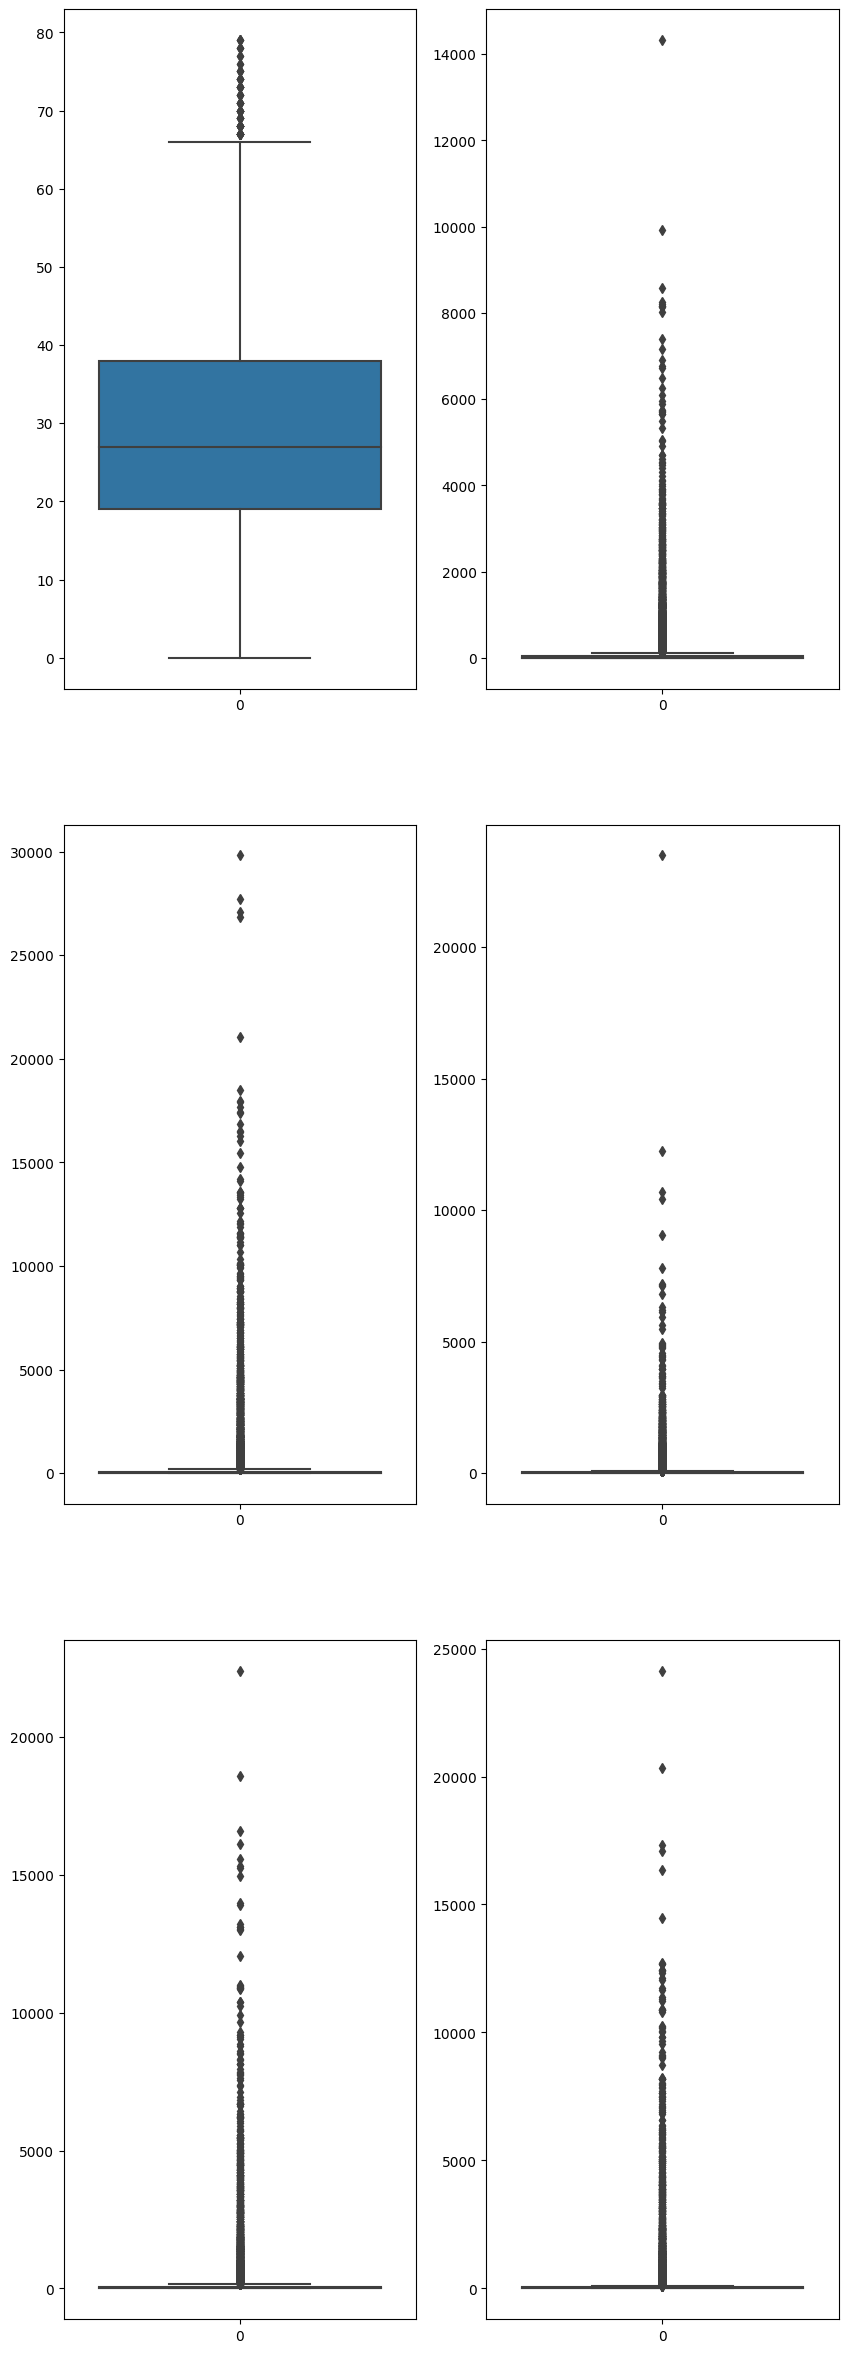

In [34]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(10,30))

sns.boxplot(ss_new['Age'], ax=ax[0,0])
sns.boxplot(ss_new['RoomService'], ax=ax[0,1])
sns.boxplot(ss_new['FoodCourt'], ax=ax[1,0])
sns.boxplot(ss_new['ShoppingMall'], ax=ax[1,1])
sns.boxplot(ss_new['Spa'], ax=ax[2,0])
sns.boxplot(ss_new['VRDeck'], ax=ax[2,1])

### StandardScaler

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ss_new)
ss_new_scaled = scaler.transform(ss_new)

StandardScaler_scaled = pd.DataFrame(data=ss_new_scaled, columns=ss_new.columns)
print('feature 들의 평균 값')
print(StandardScaler_scaled.mean())
print('\nfeature들의 분산 값')
print(StandardScaler_scaled.var())

feature 들의 평균 값
CryoSleep            3.300145e-17
Age                 -1.160670e-16
VIP                  3.984696e-18
RoomService         -1.123888e-17
FoodCourt            3.432968e-17
ShoppingMall         2.860807e-17
Spa                 -2.452120e-17
VRDeck               4.924675e-17
Transported          7.029412e-17
CryoSleep_False     -3.300145e-17
CryoSleep_True       3.300145e-17
VIP_False           -1.638834e-16
VIP_True             3.984696e-18
Transported_False    7.887654e-17
Transported_True     7.029412e-17
dtype: float64

feature들의 분산 값
CryoSleep            1.000115
Age                  1.000115
VIP                  1.000115
RoomService          1.000115
FoodCourt            1.000115
ShoppingMall         1.000115
Spa                  1.000115
VRDeck               1.000115
Transported          1.000115
CryoSleep_False      1.000115
CryoSleep_True       1.000115
VIP_False            1.000115
VIP_True             1.000115
Transported_False    1.000115
Transported_True     1.

In [36]:
StandardScaler_scaled

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CryoSleep_False,CryoSleep_True,VIP_False,VIP_True,Transported_False,Transported_True
0,-0.746543,0.702706,-0.155020,-0.338320,-0.285201,-0.287182,-0.273944,-0.264863,-1.007274,0.746543,-0.746543,0.155020,-0.155020,1.007274,-1.007274
1,-0.746543,-0.332151,-0.155020,-0.173954,-0.279615,-0.245435,0.209599,-0.226562,0.992779,0.746543,-0.746543,0.155020,-0.155020,-0.992779,0.992779
2,-0.746543,2.013525,6.450794,-0.273478,1.934223,-0.287182,5.640434,-0.222209,-1.007274,0.746543,-0.746543,-6.450794,6.450794,1.007274,-1.007274
3,-0.746543,0.288763,-0.155020,-0.338320,0.511086,0.332339,2.658143,-0.096860,-1.007274,0.746543,-0.746543,0.155020,-0.155020,1.007274,-1.007274
4,-0.746543,-0.884075,-0.155020,0.118586,-0.241756,-0.035032,0.223691,-0.263122,0.992779,0.746543,-0.746543,0.155020,-0.155020,-0.992779,0.992779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,-0.746543,0.840687,6.450794,-0.338320,3.946973,-0.287182,1.173163,-0.200447,-1.007274,0.746543,-0.746543,-6.450794,6.450794,1.007274,-1.007274
8689,1.339507,-0.746094,-0.155020,-0.338320,-0.285201,-0.287182,-0.273944,-0.264863,-1.007274,-1.339507,1.339507,0.155020,-0.155020,1.007274,-1.007274
8690,-0.746543,-0.194170,-0.155020,-0.338320,-0.285201,2.838807,-0.273063,-0.264863,0.992779,0.746543,-0.746543,0.155020,-0.155020,-0.992779,0.992779
8691,-0.746543,0.219773,-0.155020,-0.338320,0.365855,-0.287182,0.036968,2.551142,-1.007274,0.746543,-0.746543,0.155020,-0.155020,1.007274,-1.007274


<ipython-input-37-ca43b29823b6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(StandardScaler_scaled['Age'], ax=ax[0,0])
<ipython-input-37-ca43b29823b6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(StandardScaler_scaled['RoomService'], ax=ax[0,1])
<ipython-input-37-ca43b29823b6>:5: UserWar

<Axes: xlabel='VRDeck', ylabel='Density'>

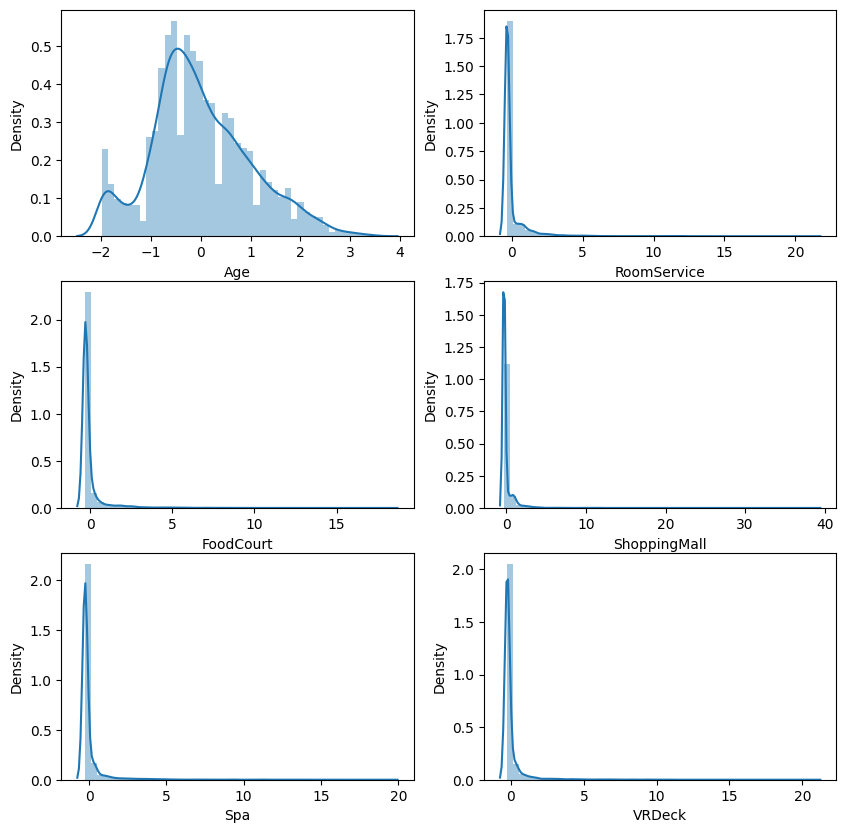

In [37]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(10,10))

sns.distplot(StandardScaler_scaled['Age'], ax=ax[0,0])
sns.distplot(StandardScaler_scaled['RoomService'], ax=ax[0,1])
sns.distplot(StandardScaler_scaled['FoodCourt'], ax=ax[1,0])
sns.distplot(StandardScaler_scaled['ShoppingMall'], ax=ax[1,1])
sns.distplot(StandardScaler_scaled['Spa'], ax=ax[2,0])
sns.distplot(StandardScaler_scaled['VRDeck'], ax=ax[2,1])

<ipython-input-38-95f96e812cd5>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(StandardScaler_scaled['CryoSleep_False'], ax=ax[0,0])
<ipython-input-38-95f96e812cd5>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(StandardScaler_scaled['CryoSleep_True'], ax=ax[0,1])
<ipython-input-38-95f96e812

<Axes: xlabel='Transported_True', ylabel='Density'>

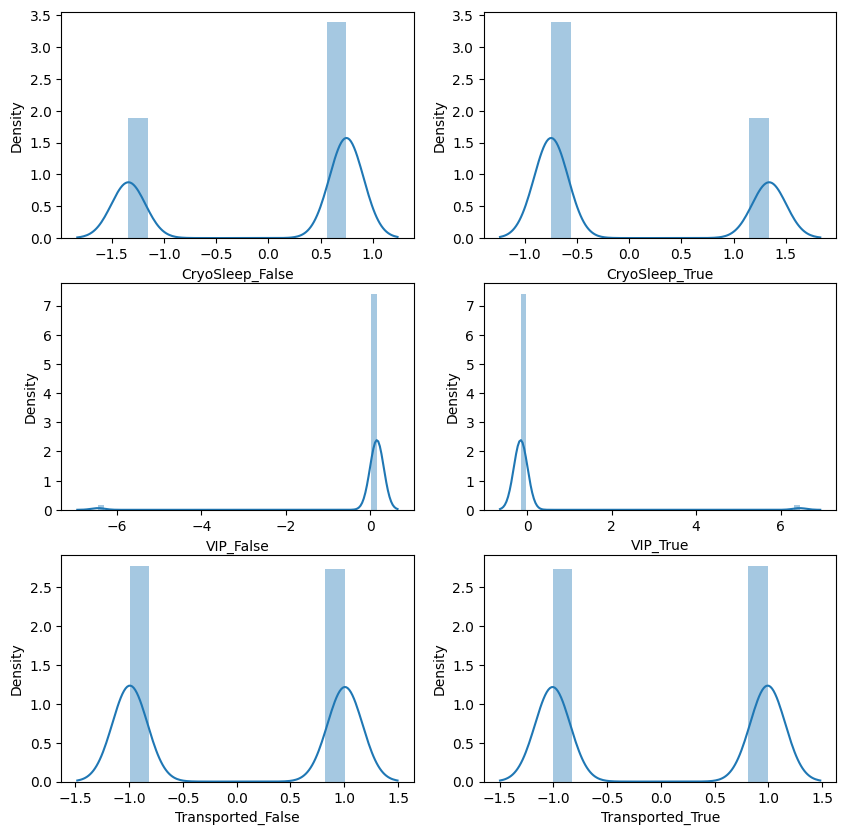

In [38]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(10,10))

sns.distplot(StandardScaler_scaled['CryoSleep_False'], ax=ax[0,0])
sns.distplot(StandardScaler_scaled['CryoSleep_True'], ax=ax[0,1])
sns.distplot(StandardScaler_scaled['VIP_False'], ax=ax[1,0])
sns.distplot(StandardScaler_scaled['VIP_True'], ax=ax[1,1])
sns.distplot(StandardScaler_scaled['Transported_False'], ax=ax[2,0])
sns.distplot(StandardScaler_scaled['Transported_True'], ax=ax[2,1])

- 왜도가 심한 경우, 표준화를 수행해도 정규화가 잘 이루어지지 않음
- 왜도가 심하면 변수들의 분포가 정규 분포에 가깝게 위치하기 떄문에, 표준화된 데이터도 왜도가 그대로 유지될 수 있다.

### MinMaxScaler

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(ss_new)
ss_new_scaled = scaler.transform(ss_new)

MinMaxScaler_scaled = pd.DataFrame(data=ss_new_scaled, columns=ss_new.columns)
print('feature 들의 평균 값')
print(MinMaxScaler_scaled.mean())
print('\nfeature들의 분산 값')
print(MinMaxScaler_scaled.var())

feature 들의 평균 값
CryoSleep            0.357874
Age                  0.364740
VIP                  0.023467
RoomService          0.015660
FoodCourt            0.015414
ShoppingMall         0.007321
Spa                  0.013880
VRDeck               0.012608
Transported          0.503624
CryoSleep_False      0.642126
CryoSleep_True       0.357874
VIP_False            0.976533
VIP_True             0.023467
Transported_False    0.496376
Transported_True     0.503624
dtype: float64

feature들의 분산 값
CryoSleep            0.229827
Age                  0.033668
VIP                  0.022919
RoomService          0.002143
FoodCourt            0.002921
ShoppingMall         0.000650
Spa                  0.002568
VRDeck               0.002266
Transported          0.250016
CryoSleep_False      0.229827
CryoSleep_True       0.229827
VIP_False            0.022919
VIP_True             0.022919
Transported_False    0.250016
Transported_True     0.250016
dtype: float64


In [40]:
MinMaxScaler_scaled

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CryoSleep_False,CryoSleep_True,VIP_False,VIP_True,Transported_False,Transported_True
0,0.0,0.493671,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.303797,0.0,0.007608,0.000302,0.001064,0.024500,0.001823,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.734177,1.0,0.003001,0.119948,0.000000,0.299670,0.002030,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.417722,0.0,0.000000,0.043035,0.015793,0.148563,0.007997,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.202532,0.0,0.021149,0.002348,0.006428,0.025214,0.000083,1.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,0.518987,1.0,0.000000,0.228726,0.000000,0.073322,0.003066,0.0,1.0,0.0,0.0,1.0,1.0,0.0
8689,1.0,0.227848,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,1.0,0.0,1.0,0.0
8690,0.0,0.329114,0.0,0.000000,0.000000,0.079687,0.000045,0.000000,1.0,1.0,0.0,1.0,0.0,0.0,1.0
8691,0.0,0.405063,0.0,0.000000,0.035186,0.000000,0.015753,0.134049,0.0,1.0,0.0,1.0,0.0,1.0,0.0


<ipython-input-41-bc314d1f0b63>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(MinMaxScaler_scaled['Age'], ax=ax[0,0])
<ipython-input-41-bc314d1f0b63>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(MinMaxScaler_scaled['RoomService'], ax=ax[0,1])
<ipython-input-41-bc314d1f0b63>:5: UserWarning

<Axes: xlabel='VRDeck', ylabel='Density'>

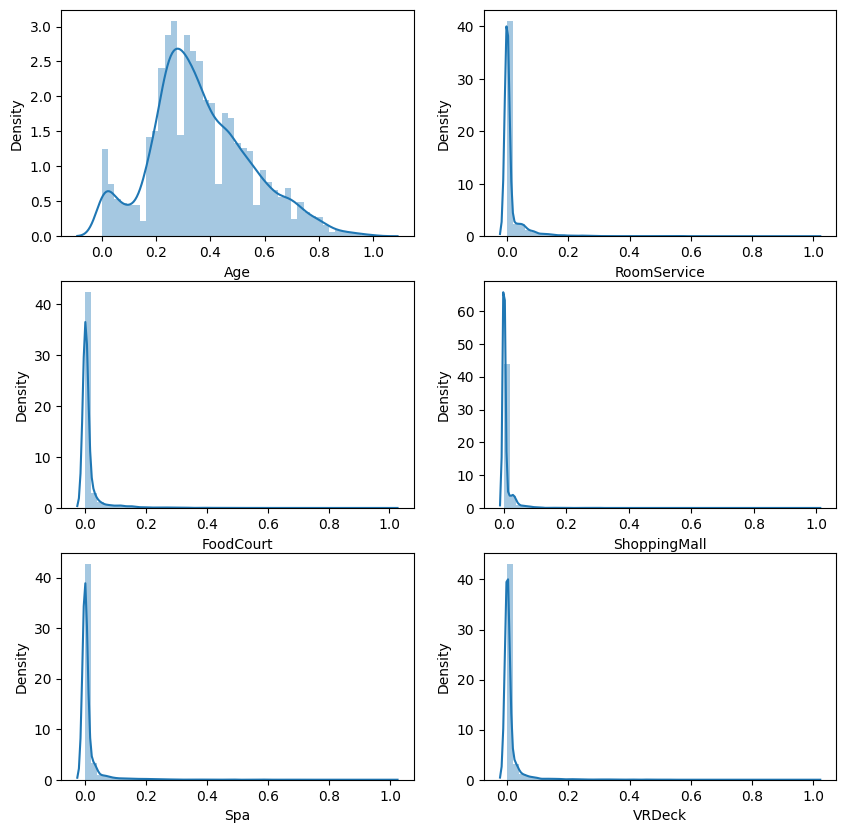

In [41]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(10,10))

sns.distplot(MinMaxScaler_scaled['Age'], ax=ax[0,0])
sns.distplot(MinMaxScaler_scaled['RoomService'], ax=ax[0,1])
sns.distplot(MinMaxScaler_scaled['FoodCourt'], ax=ax[1,0])
sns.distplot(MinMaxScaler_scaled['ShoppingMall'], ax=ax[1,1])
sns.distplot(MinMaxScaler_scaled['Spa'], ax=ax[2,0])
sns.distplot(MinMaxScaler_scaled['VRDeck'], ax=ax[2,1])

<ipython-input-42-8fa63a1bd1f1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(MinMaxScaler_scaled['CryoSleep_False'], ax=ax[0,0])
<ipython-input-42-8fa63a1bd1f1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(MinMaxScaler_scaled['CryoSleep_True'], ax=ax[0,1])
<ipython-input-42-8fa63a1bd1f1>

<Axes: xlabel='Transported_True', ylabel='Density'>

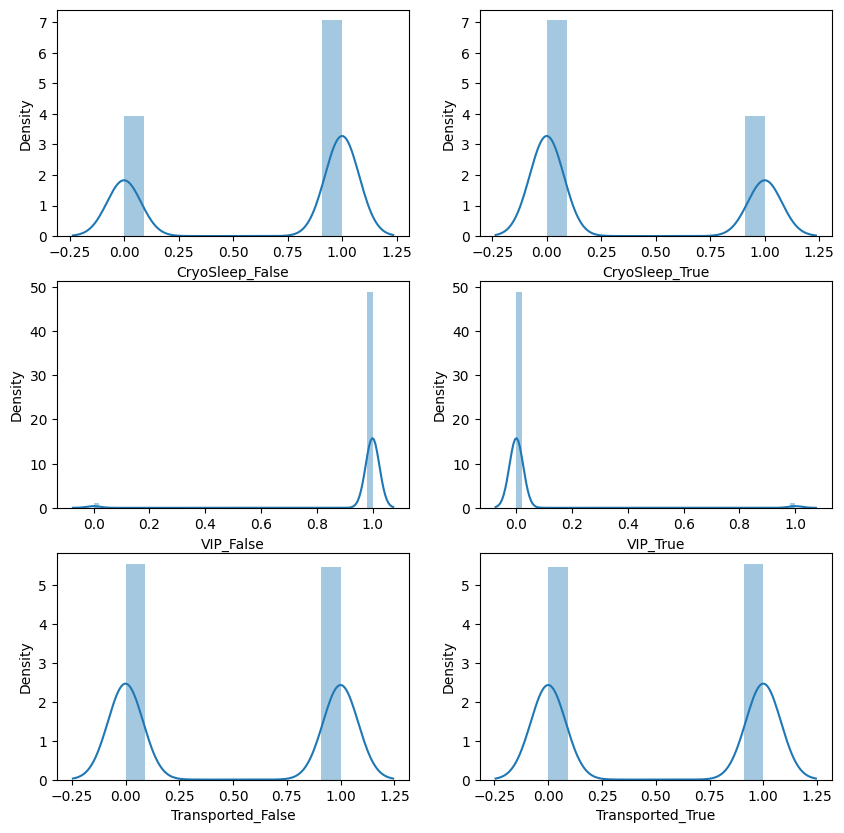

In [42]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(10,10))

sns.distplot(MinMaxScaler_scaled['CryoSleep_False'], ax=ax[0,0])
sns.distplot(MinMaxScaler_scaled['CryoSleep_True'], ax=ax[0,1])
sns.distplot(MinMaxScaler_scaled['VIP_False'], ax=ax[1,0])
sns.distplot(MinMaxScaler_scaled['VIP_True'], ax=ax[1,1])
sns.distplot(MinMaxScaler_scaled['Transported_False'], ax=ax[2,0])
sns.distplot(MinMaxScaler_scaled['Transported_True'], ax=ax[2,1])

- MinMaxScaler도 StandardScaler와 마찬가지로 정규화되지 않음

### MaxAbsScaler

In [43]:
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
scaler.fit(ss_new)
ss_new_scaled = scaler.transform(ss_new)

MaxAbsScaler_scaled = pd.DataFrame(data=ss_new_scaled, columns=ss_new.columns)
print('feature 들의 평균 값')
print(MaxAbsScaler_scaled.mean())
print('\nfeature들의 분산 값')
print(MaxAbsScaler_scaled.var())

feature 들의 평균 값
CryoSleep            0.357874
Age                  0.364740
VIP                  0.023467
RoomService          0.015660
FoodCourt            0.015414
ShoppingMall         0.007321
Spa                  0.013880
VRDeck               0.012608
Transported          0.503624
CryoSleep_False      0.642126
CryoSleep_True       0.357874
VIP_False            0.976533
VIP_True             0.023467
Transported_False    0.496376
Transported_True     0.503624
dtype: float64

feature들의 분산 값
CryoSleep            0.229827
Age                  0.033668
VIP                  0.022919
RoomService          0.002143
FoodCourt            0.002921
ShoppingMall         0.000650
Spa                  0.002568
VRDeck               0.002266
Transported          0.250016
CryoSleep_False      0.229827
CryoSleep_True       0.229827
VIP_False            0.022919
VIP_True             0.022919
Transported_False    0.250016
Transported_True     0.250016
dtype: float64


In [44]:
MaxAbsScaler_scaled

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CryoSleep_False,CryoSleep_True,VIP_False,VIP_True,Transported_False,Transported_True
0,0.0,0.493671,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.0,0.303797,0.0,0.007608,0.000302,0.001064,0.024500,0.001823,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,0.0,0.734177,1.0,0.003001,0.119948,0.000000,0.299670,0.002030,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.417722,0.0,0.000000,0.043035,0.015793,0.148563,0.007997,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,0.0,0.202532,0.0,0.021149,0.002348,0.006428,0.025214,0.000083,1.0,1.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,0.518987,1.0,0.000000,0.228726,0.000000,0.073322,0.003066,0.0,1.0,0.0,0.0,1.0,1.0,0.0
8689,1.0,0.227848,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,1.0,0.0,1.0,0.0
8690,0.0,0.329114,0.0,0.000000,0.000000,0.079687,0.000045,0.000000,1.0,1.0,0.0,1.0,0.0,0.0,1.0
8691,0.0,0.405063,0.0,0.000000,0.035186,0.000000,0.015753,0.134049,0.0,1.0,0.0,1.0,0.0,1.0,0.0


<ipython-input-45-9b8d95f4ce6c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(MaxAbsScaler_scaled['Age'], ax=ax[0,0])
<ipython-input-45-9b8d95f4ce6c>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(MaxAbsScaler_scaled['RoomService'], ax=ax[0,1])
<ipython-input-45-9b8d95f4ce6c>:5: UserWarning

<Axes: xlabel='VRDeck', ylabel='Density'>

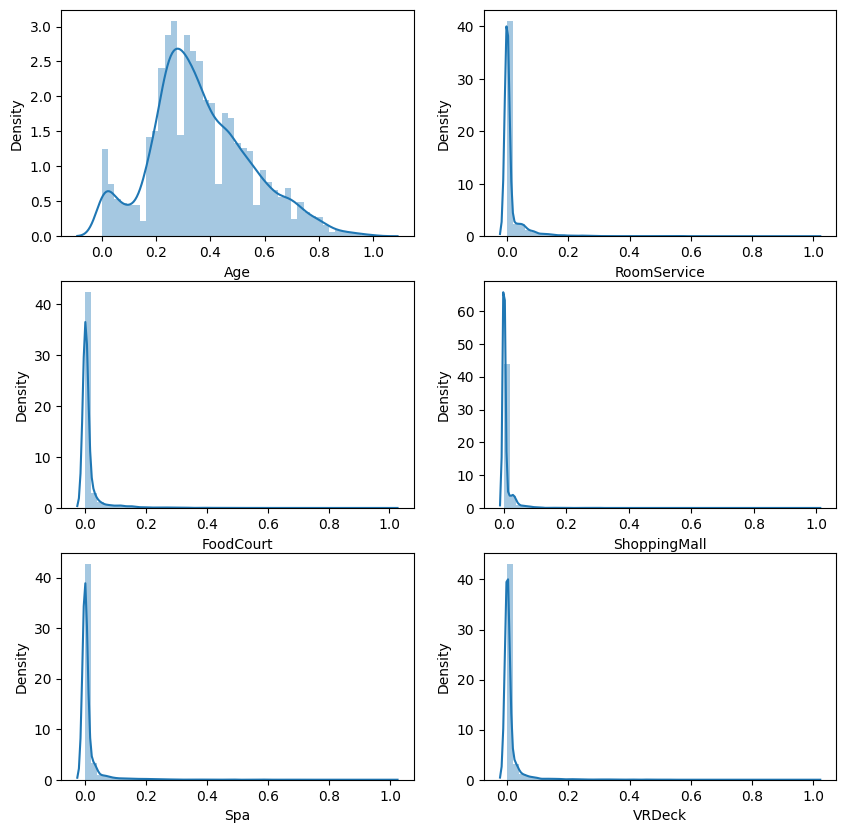

In [45]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(10,10))

sns.distplot(MaxAbsScaler_scaled['Age'], ax=ax[0,0])
sns.distplot(MaxAbsScaler_scaled['RoomService'], ax=ax[0,1])
sns.distplot(MaxAbsScaler_scaled['FoodCourt'], ax=ax[1,0])
sns.distplot(MaxAbsScaler_scaled['ShoppingMall'], ax=ax[1,1])
sns.distplot(MaxAbsScaler_scaled['Spa'], ax=ax[2,0])
sns.distplot(MaxAbsScaler_scaled['VRDeck'], ax=ax[2,1])

<ipython-input-47-d39a38b698d6>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(MaxAbsScaler_scaled['CryoSleep_False'], ax=ax[0,0])
<ipython-input-47-d39a38b698d6>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(MaxAbsScaler_scaled['CryoSleep_True'], ax=ax[0,1])
<ipython-input-47-d39a38b698d6>

<Axes: xlabel='Transported_True', ylabel='Density'>

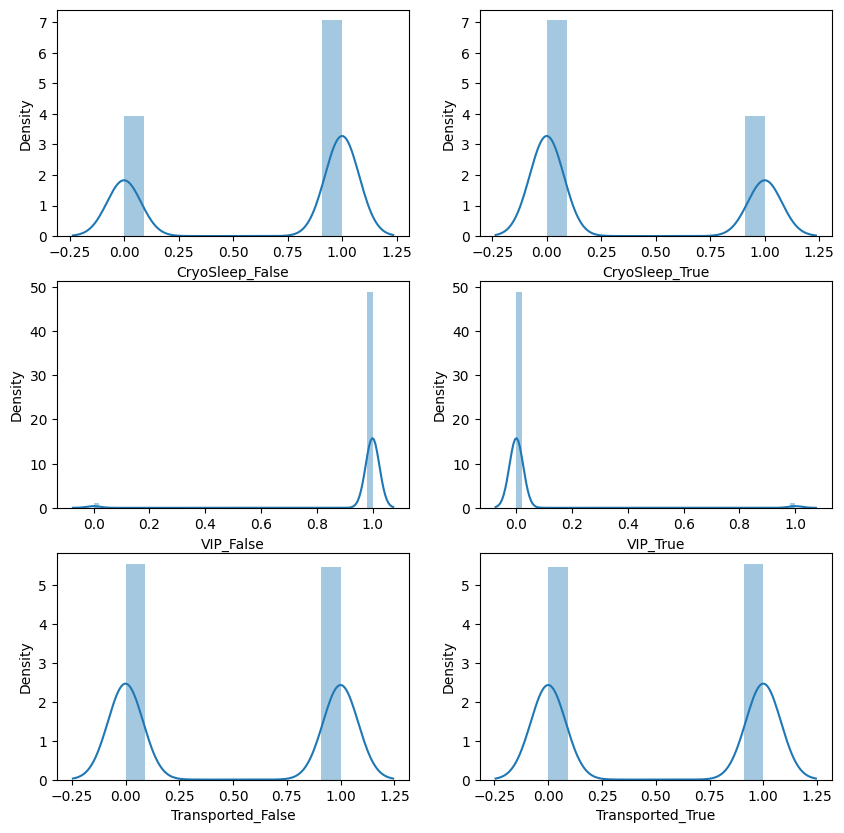

In [47]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(10,10))

sns.distplot(MaxAbsScaler_scaled['CryoSleep_False'], ax=ax[0,0])
sns.distplot(MaxAbsScaler_scaled['CryoSleep_True'], ax=ax[0,1])
sns.distplot(MaxAbsScaler_scaled['VIP_False'], ax=ax[1,0])
sns.distplot(MaxAbsScaler_scaled['VIP_True'], ax=ax[1,1])
sns.distplot(MaxAbsScaler_scaled['Transported_False'], ax=ax[2,0])
sns.distplot(MaxAbsScaler_scaled['Transported_True'], ax=ax[2,1])

### RobustScaler

In [48]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaler.fit(ss_new)
ss_new_scaled = scaler.transform(ss_new)

RobustScaler_scaled = pd.DataFrame(data=ss_new_scaled, columns=ss_new.columns)
print('feature 들의 평균 값')
print(RobustScaler_scaled.mean())
print('\nfeature들의 분산 값')
print(RobustScaler_scaled.var())

feature 들의 평균 값
CryoSleep            0.357874
Age                  0.095497
VIP                  0.023467
RoomService          4.674144
FoodCourt            5.967847
ShoppingMall         6.614571
Spa                  5.098815
VRDeck               6.915266
Transported         -0.496376
CryoSleep_False     -0.357874
CryoSleep_True       0.357874
VIP_False           -0.023467
VIP_True             0.023467
Transported_False    0.496376
Transported_True    -0.496376
dtype: float64

feature들의 분산 값
CryoSleep              0.229827
Age                    0.582056
VIP                    0.022919
RoomService          190.896987
FoodCourt            437.907866
ShoppingMall         530.566907
Spa                  346.468845
VRDeck               681.751843
Transported            0.250016
CryoSleep_False        0.229827
CryoSleep_True         0.229827
VIP_False              0.022919
VIP_True               0.022919
Transported_False      0.250016
Transported_True       0.250016
dtype: float64


In [49]:
RobustScaler_scaled

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CryoSleep_False,CryoSleep_True,VIP_False,VIP_True,Transported_False,Transported_True
0,0.0,0.631579,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-1.0,0.0,0.0,0.0,0.0,1.0,-1.0
1,0.0,-0.157895,0.0,2.270833,0.116883,0.961538,9.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.631579,1.0,0.895833,46.441558,0.000000,110.081967,1.113636,-1.0,0.0,0.0,-1.0,1.0,1.0,-1.0
3,0.0,0.315789,0.0,0.000000,16.662338,14.269231,54.573770,4.386364,-1.0,0.0,0.0,0.0,0.0,1.0,-1.0
4,0.0,-0.578947,0.0,6.312500,0.909091,5.807692,9.262295,0.045455,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.0,0.736842,1.0,0.000000,88.558442,0.000000,26.934426,1.681818,-1.0,0.0,0.0,-1.0,1.0,1.0,-1.0
8689,1.0,-0.473684,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,-1.0,-1.0,1.0,0.0,0.0,1.0,-1.0
8690,0.0,-0.052632,0.0,0.000000,0.000000,72.000000,0.016393,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8691,0.0,0.263158,0.0,0.000000,13.623377,0.000000,5.786885,73.522727,-1.0,0.0,0.0,0.0,0.0,1.0,-1.0


<ipython-input-50-d3c843c4af6f>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RobustScaler_scaled['Age'], ax=ax[0,0])
<ipython-input-50-d3c843c4af6f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RobustScaler_scaled['RoomService'], ax=ax[0,1])
<ipython-input-50-d3c843c4af6f>:5: UserWarning

<Axes: xlabel='VRDeck', ylabel='Density'>

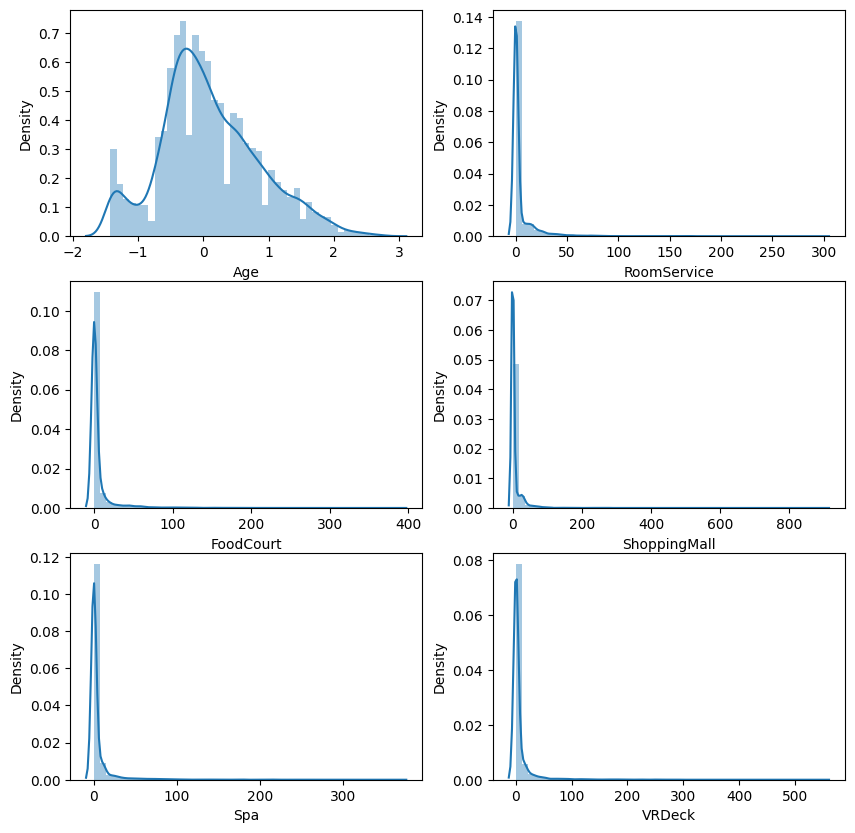

In [50]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(10,10))

sns.distplot(RobustScaler_scaled['Age'], ax=ax[0,0])
sns.distplot(RobustScaler_scaled['RoomService'], ax=ax[0,1])
sns.distplot(RobustScaler_scaled['FoodCourt'], ax=ax[1,0])
sns.distplot(RobustScaler_scaled['ShoppingMall'], ax=ax[1,1])
sns.distplot(RobustScaler_scaled['Spa'], ax=ax[2,0])
sns.distplot(RobustScaler_scaled['VRDeck'], ax=ax[2,1])

<ipython-input-51-6461bff87e85>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RobustScaler_scaled['CryoSleep_False'], ax=ax[0,0])
<ipython-input-51-6461bff87e85>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(RobustScaler_scaled['CryoSleep_True'], ax=ax[0,1])
<ipython-input-51-6461bff87e85>

<Axes: xlabel='Transported_True', ylabel='Density'>

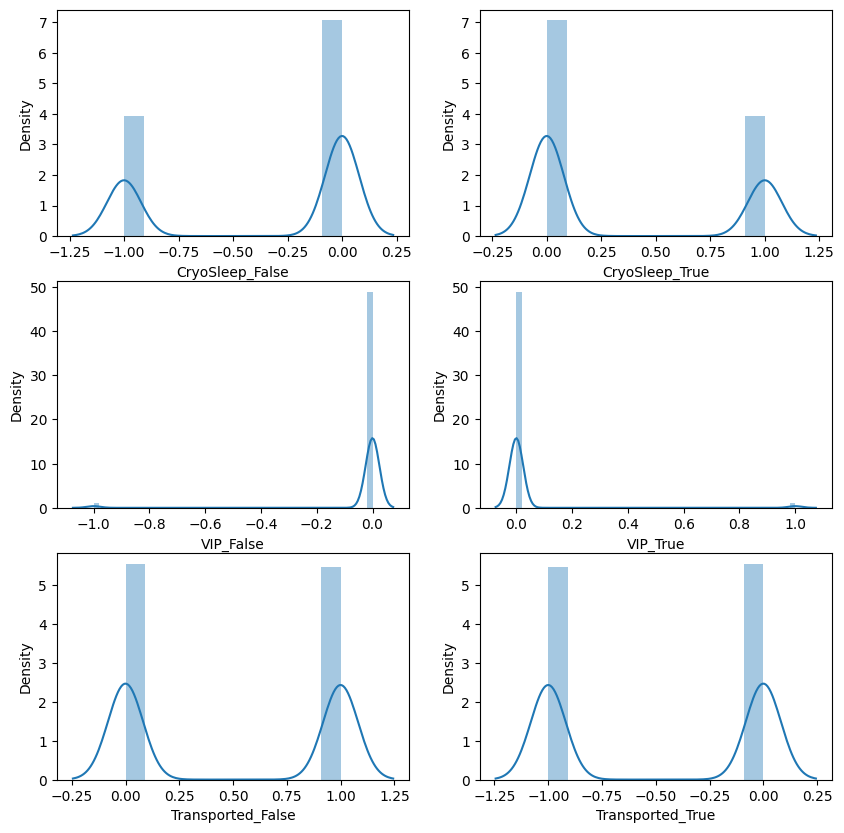

In [51]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(10,10))

sns.distplot(RobustScaler_scaled['CryoSleep_False'], ax=ax[0,0])
sns.distplot(RobustScaler_scaled['CryoSleep_True'], ax=ax[0,1])
sns.distplot(RobustScaler_scaled['VIP_False'], ax=ax[1,0])
sns.distplot(RobustScaler_scaled['VIP_True'], ax=ax[1,1])
sns.distplot(RobustScaler_scaled['Transported_False'], ax=ax[2,0])
sns.distplot(RobustScaler_scaled['Transported_True'], ax=ax[2,1])

### Normalizer

In [52]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer()
scaler.fit(ss_new)
ss_new_scaled = scaler.transform(ss_new)

Normalizer_scaled = pd.DataFrame(data=ss_new_scaled, columns=ss_new.columns)
print('feature 들의 평균 값')
print(Normalizer_scaled.mean())
print('\nfeature들의 분산 값')
print(Normalizer_scaled.var())

feature 들의 평균 값
CryoSleep            0.023279
Age                  0.397034
VIP                  0.000116
RoomService          0.159300
FoodCourt            0.161347
ShoppingMall         0.133990
Spa                  0.141635
VRDeck               0.134725
Transported          0.028222
CryoSleep_False      0.014477
CryoSleep_True       0.023279
VIP_False            0.037641
VIP_True             0.000116
Transported_False    0.009534
Transported_True     0.028222
dtype: float64

feature들의 분산 값
CryoSleep            0.003926
Age                  0.212454
VIP                  0.000003
RoomService          0.106948
FoodCourt            0.105292
ShoppingMall         0.090014
Spa                  0.091779
VRDeck               0.088251
Transported          0.006254
CryoSleep_False      0.004861
CryoSleep_True       0.003926
VIP_False            0.008118
VIP_True             0.000003
Transported_False    0.002396
Transported_True     0.006254
dtype: float64


In [53]:
Normalizer_scaled

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CryoSleep_False,CryoSleep_True,VIP_False,VIP_True,Transported_False,Transported_True
0,0.000000,0.999015,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025616,0.000000,0.025616,0.000000,0.025616,0.000000
1,0.000000,0.042660,0.000000,0.193748,0.015998,0.044438,0.975849,0.078210,0.001778,0.001778,0.000000,0.001778,0.000000,0.000000,0.001778
2,0.000000,0.007623,0.000131,0.005652,0.470011,0.000000,0.882586,0.006440,0.000000,0.000131,0.000000,0.000000,0.000131,0.000131,0.000000
3,0.000000,0.009186,0.000000,0.000000,0.357157,0.103278,0.926715,0.053727,0.000000,0.000278,0.000000,0.000278,0.000000,0.000278,0.000000
4,0.000000,0.024148,0.000000,0.457310,0.105649,0.227900,0.852740,0.003019,0.001509,0.001509,0.000000,0.001509,0.000000,0.000000,0.001509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.000000,0.005845,0.000143,0.000000,0.972108,0.000000,0.234224,0.010549,0.000000,0.000143,0.000000,0.000000,0.000143,0.000143,0.000000
8689,0.055216,0.993884,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055216,0.055216,0.000000,0.055216,0.000000
8690,0.000000,0.013888,0.000000,0.000000,0.000000,0.999903,0.000534,0.000000,0.000534,0.000534,0.000000,0.000534,0.000000,0.000000,0.000534
8691,0.000000,0.009359,0.000000,0.000000,0.306793,0.000000,0.103239,0.946114,0.000000,0.000292,0.000000,0.000292,0.000000,0.000292,0.000000


<ipython-input-54-c0b48ae23355>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Normalizer_scaled['Age'], ax=ax[0,0])
<ipython-input-54-c0b48ae23355>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Normalizer_scaled['RoomService'], ax=ax[0,1])
<ipython-input-54-c0b48ae23355>:5: UserWarning: 



<Axes: xlabel='VRDeck', ylabel='Density'>

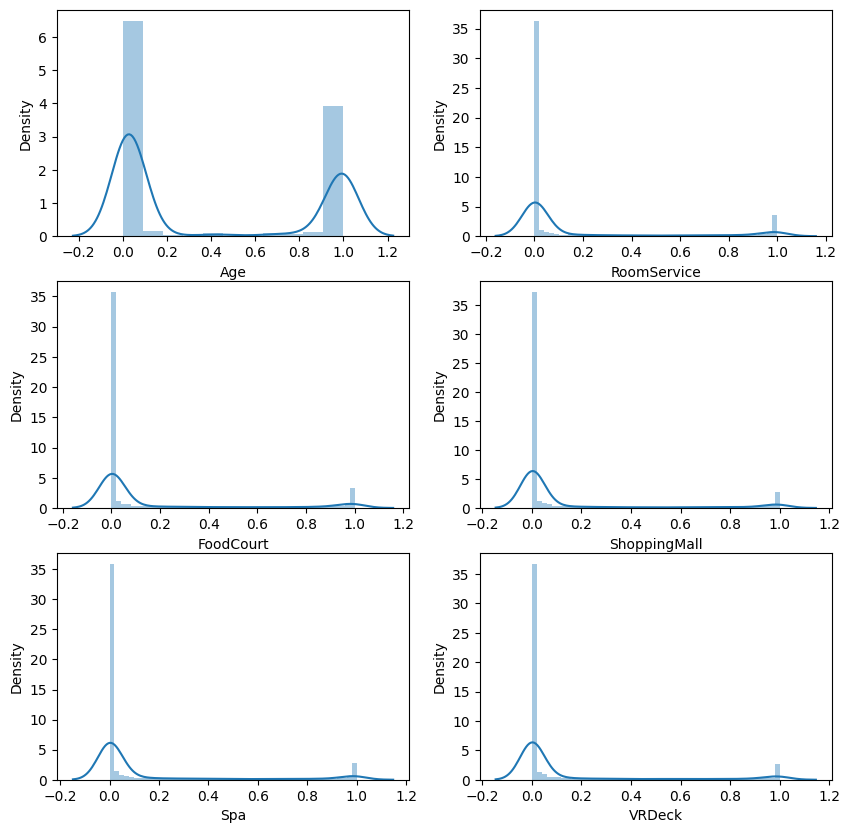

In [54]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(10,10))

sns.distplot(Normalizer_scaled['Age'], ax=ax[0,0])
sns.distplot(Normalizer_scaled['RoomService'], ax=ax[0,1])
sns.distplot(Normalizer_scaled['FoodCourt'], ax=ax[1,0])
sns.distplot(Normalizer_scaled['ShoppingMall'], ax=ax[1,1])
sns.distplot(Normalizer_scaled['Spa'], ax=ax[2,0])
sns.distplot(Normalizer_scaled['VRDeck'], ax=ax[2,1])

<ipython-input-55-74e661bd0014>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Normalizer_scaled['CryoSleep_False'], ax=ax[0,0])
<ipython-input-55-74e661bd0014>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Normalizer_scaled['CryoSleep_True'], ax=ax[0,1])
<ipython-input-55-74e661bd0014>:5: 

<Axes: xlabel='Transported_True', ylabel='Density'>

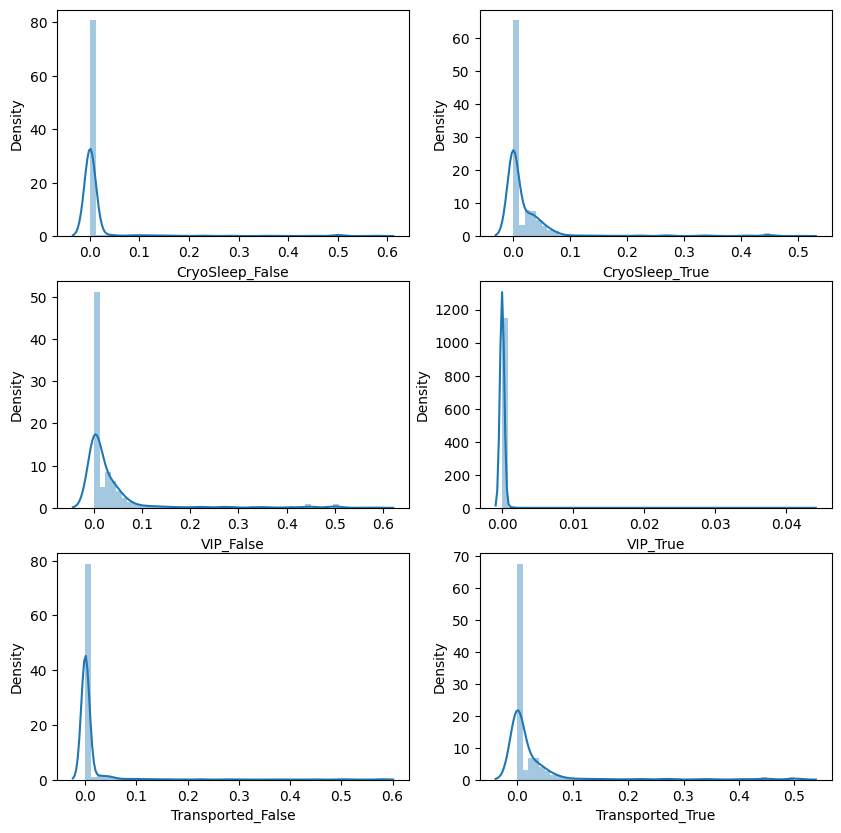

In [55]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(10,10))

sns.distplot(Normalizer_scaled['CryoSleep_False'], ax=ax[0,0])
sns.distplot(Normalizer_scaled['CryoSleep_True'], ax=ax[0,1])
sns.distplot(Normalizer_scaled['VIP_False'], ax=ax[1,0])
sns.distplot(Normalizer_scaled['VIP_True'], ax=ax[1,1])
sns.distplot(Normalizer_scaled['Transported_False'], ax=ax[2,0])
sns.distplot(Normalizer_scaled['Transported_True'], ax=ax[2,1])

### 로그 스케일링

In [56]:
ss_new_log = np.log1p(ss_new)
ss_new_log

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CryoSleep_False,CryoSleep_True,VIP_False,VIP_True,Transported_False,Transported_True
0,0.000000,3.688879,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693359,0.000000,0.693359,0.000000,0.693359,0.000000
1,0.000000,3.218876,0.000000,4.700480,2.302585,3.258097,6.309918,3.806662,0.693359,0.693359,0.000000,0.693359,0.000000,0.000000,0.693359
2,0.000000,4.077537,0.693359,3.784190,8.182280,0.000000,8.812248,3.912023,0.000000,0.693359,0.000000,0.000000,0.693359,0.693359,0.000000
3,0.000000,3.526361,0.000000,0.000000,7.157735,5.918894,8.110728,5.267858,0.000000,0.693359,0.000000,0.693359,0.000000,0.693359,0.000000
4,0.000000,2.833213,0.000000,5.717028,4.262680,5.023881,6.338594,1.098612,0.693359,0.693359,0.000000,0.693359,0.000000,0.000000,0.693359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.000000,3.737670,0.693359,0.000000,8.827615,0.000000,7.404888,4.317488,0.000000,0.693359,0.000000,0.000000,0.693359,0.693359,0.000000
8689,0.693359,2.944439,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693359,0.693359,0.000000,0.693359,0.000000
8690,0.000000,3.295837,0.000000,0.000000,0.000000,7.535297,0.693147,0.000000,0.693359,0.693359,0.000000,0.693359,0.000000,0.000000,0.693359
8691,0.000000,3.496508,0.000000,0.000000,6.956545,0.000000,5.869297,8.082093,0.000000,0.693359,0.000000,0.693359,0.000000,0.693359,0.000000


<ipython-input-57-1cd3ecbe0f5e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ss_new_log['Age'], ax=ax[0,0])
<ipython-input-57-1cd3ecbe0f5e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ss_new_log['RoomService'], ax=ax[0,1])
<ipython-input-57-1cd3ecbe0f5e>:5: UserWarning: 

`distplot` is 

<Axes: xlabel='VRDeck', ylabel='Density'>

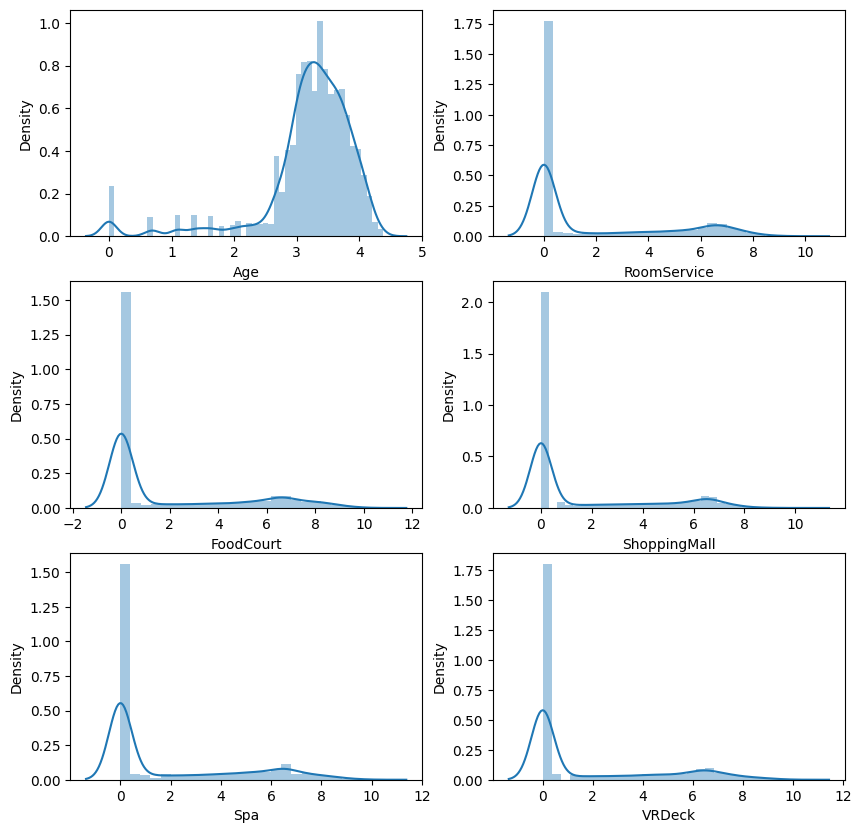

In [57]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(10,10))

sns.distplot(ss_new_log['Age'], ax=ax[0,0])
sns.distplot(ss_new_log['RoomService'], ax=ax[0,1])
sns.distplot(ss_new_log['FoodCourt'], ax=ax[1,0])
sns.distplot(ss_new_log['ShoppingMall'], ax=ax[1,1])
sns.distplot(ss_new_log['Spa'], ax=ax[2,0])
sns.distplot(ss_new_log['VRDeck'], ax=ax[2,1])

<ipython-input-59-bf668bc79218>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ss_new_log['CryoSleep_False'], ax=ax[0,0])
<ipython-input-59-bf668bc79218>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ss_new_log['CryoSleep_True'], ax=ax[0,1])
<ipython-input-59-bf668bc79218>:5: UserWarning: 


<Axes: xlabel='Transported_True', ylabel='Density'>

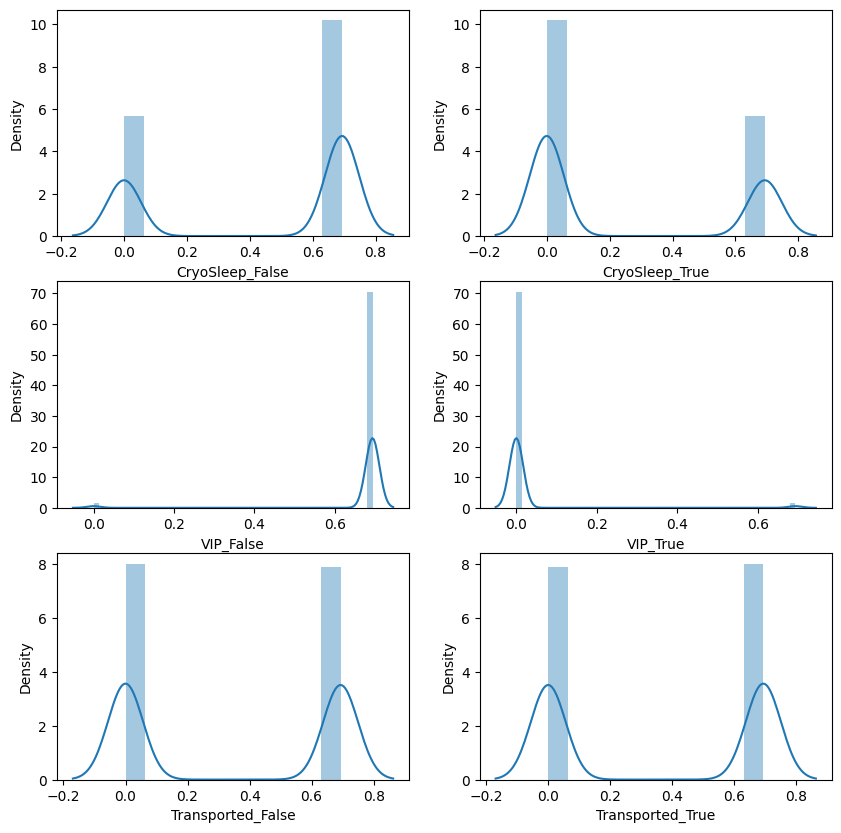

In [59]:
fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(10,10))

sns.distplot(ss_new_log['CryoSleep_False'], ax=ax[0,0])
sns.distplot(ss_new_log['CryoSleep_True'], ax=ax[0,1])
sns.distplot(ss_new_log['VIP_False'], ax=ax[1,0])
sns.distplot(ss_new_log['VIP_True'], ax=ax[1,1])
sns.distplot(ss_new_log['Transported_False'], ax=ax[2,0])
sns.distplot(ss_new_log['Transported_True'], ax=ax[2,1])

- Age의 경우 StandardScaler,
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck의 경우 왜도가 심하므로 로그스케일링을,
- CryoSleep_False, CryoSleep_True, VIP_False, VIP_True의 값도 로그스케일링을 했을 경우가 더 데이터가 정규화와 가깝기 때문에 로그스케일링 진행

In [72]:
ss_new

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,CryoSleep_False,CryoSleep_True,VIP_False,VIP_True,Transported_False,Transported_True
0,False,39.0,False,0.0,0.0,0.0,0.0,0.0,False,1,0,1,0,1,0
1,False,24.0,False,109.0,9.0,25.0,549.0,44.0,True,1,0,1,0,0,1
2,False,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,1,0,0,1,1,0
3,False,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,1,0,1,0,1,0
4,False,16.0,False,303.0,70.0,151.0,565.0,2.0,True,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,False,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,1,0,0,1,1,0
8689,True,18.0,False,0.0,0.0,0.0,0.0,0.0,False,0,1,1,0,1,0
8690,False,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,1,0,1,0,0,1
8691,False,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,1,0,1,0,1,0


In [73]:
ss = ss_new[['CryoSleep','VIP','Transported']]

In [74]:
ss

,CryoSleep,VIP,Transported
0,False,False,False
1,False,False,True
2,False,True,False
3,False,False,False
4,False,False,True
...,...,...,...
8688,False,True,False
8689,True,False,False
8690,False,False,True
8691,False,False,False


In [75]:
scaler = StandardScaler()
scaler.fit(ss_new[['Age']])
scaled_ss1 = scaler.transform(ss_new[['Age']])

In [76]:
scaled_ss1 = pd.DataFrame(data=scaled_ss1, columns=['Age'])
scaled_ss1

,Age
0,0.702706
1,-0.332151
2,2.013525
3,0.288763
4,-0.884075
...,...
8688,0.840687
8689,-0.746094
8690,-0.194170
8691,0.219773


In [77]:
scaled_ss2 = np.log1p(ss_new[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','CryoSleep_False','CryoSleep_True','VIP_False','VIP_True','Transported_False','Transported_True']])
scaled_ss2

,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep_False,CryoSleep_True,VIP_False,VIP_True,Transported_False,Transported_True
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.693359,0.000000,0.693359,0.000000,0.693359,0.000000
1,4.700480,2.302585,3.258097,6.309918,3.806662,0.693359,0.000000,0.693359,0.000000,0.000000,0.693359
2,3.784190,8.182280,0.000000,8.812248,3.912023,0.693359,0.000000,0.000000,0.693359,0.693359,0.000000
3,0.000000,7.157735,5.918894,8.110728,5.267858,0.693359,0.000000,0.693359,0.000000,0.693359,0.000000
4,5.717028,4.262680,5.023881,6.338594,1.098612,0.693359,0.000000,0.693359,0.000000,0.000000,0.693359
...,...,...,...,...,...,...,...,...,...,...,...
8688,0.000000,8.827615,0.000000,7.404888,4.317488,0.693359,0.000000,0.000000,0.693359,0.693359,0.000000
8689,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693359,0.693359,0.000000,0.693359,0.000000
8690,0.000000,0.000000,7.535297,0.693147,0.000000,0.693359,0.000000,0.693359,0.000000,0.000000,0.693359
8691,0.000000,6.956545,0.000000,5.869297,8.082093,0.693359,0.000000,0.693359,0.000000,0.693359,0.000000


In [78]:
scaled_spaceship = pd.concat([scaled_ss1, scaled_ss2, ss],axis=1)

In [79]:
scaled_spaceship

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep_False,CryoSleep_True,VIP_False,VIP_True,Transported_False,Transported_True,CryoSleep,VIP,Transported
0,0.702706,0.000000,0.000000,0.000000,0.000000,0.000000,0.693359,0.000000,0.693359,0.000000,0.693359,0.000000,False,False,False
1,-0.332151,4.700480,2.302585,3.258097,6.309918,3.806662,0.693359,0.000000,0.693359,0.000000,0.000000,0.693359,False,False,True
2,2.013525,3.784190,8.182280,0.000000,8.812248,3.912023,0.693359,0.000000,0.000000,0.693359,0.693359,0.000000,False,True,False
3,0.288763,0.000000,7.157735,5.918894,8.110728,5.267858,0.693359,0.000000,0.693359,0.000000,0.693359,0.000000,False,False,False
4,-0.884075,5.717028,4.262680,5.023881,6.338594,1.098612,0.693359,0.000000,0.693359,0.000000,0.000000,0.693359,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.840687,0.000000,8.827615,0.000000,7.404888,4.317488,0.693359,0.000000,0.000000,0.693359,0.693359,0.000000,False,True,False
8689,-0.746094,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.693359,0.693359,0.000000,0.693359,0.000000,True,False,False
8690,-0.194170,0.000000,0.000000,7.535297,0.693147,0.000000,0.693359,0.000000,0.693359,0.000000,0.000000,0.693359,False,False,True
8691,0.219773,0.000000,6.956545,0.000000,5.869297,8.082093,0.693359,0.000000,0.693359,0.000000,0.693359,0.000000,False,False,False


<ipython-input-83-6662e8a83ddf>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scaled_spaceship['Age'], ax=ax[0,0])
<ipython-input-83-6662e8a83ddf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(scaled_spaceship['RoomService'], ax=ax[0,1])
<ipython-input-83-6662e8a83ddf>:5: UserWarning: 

`d

<Axes: xlabel='Transported_True', ylabel='Density'>

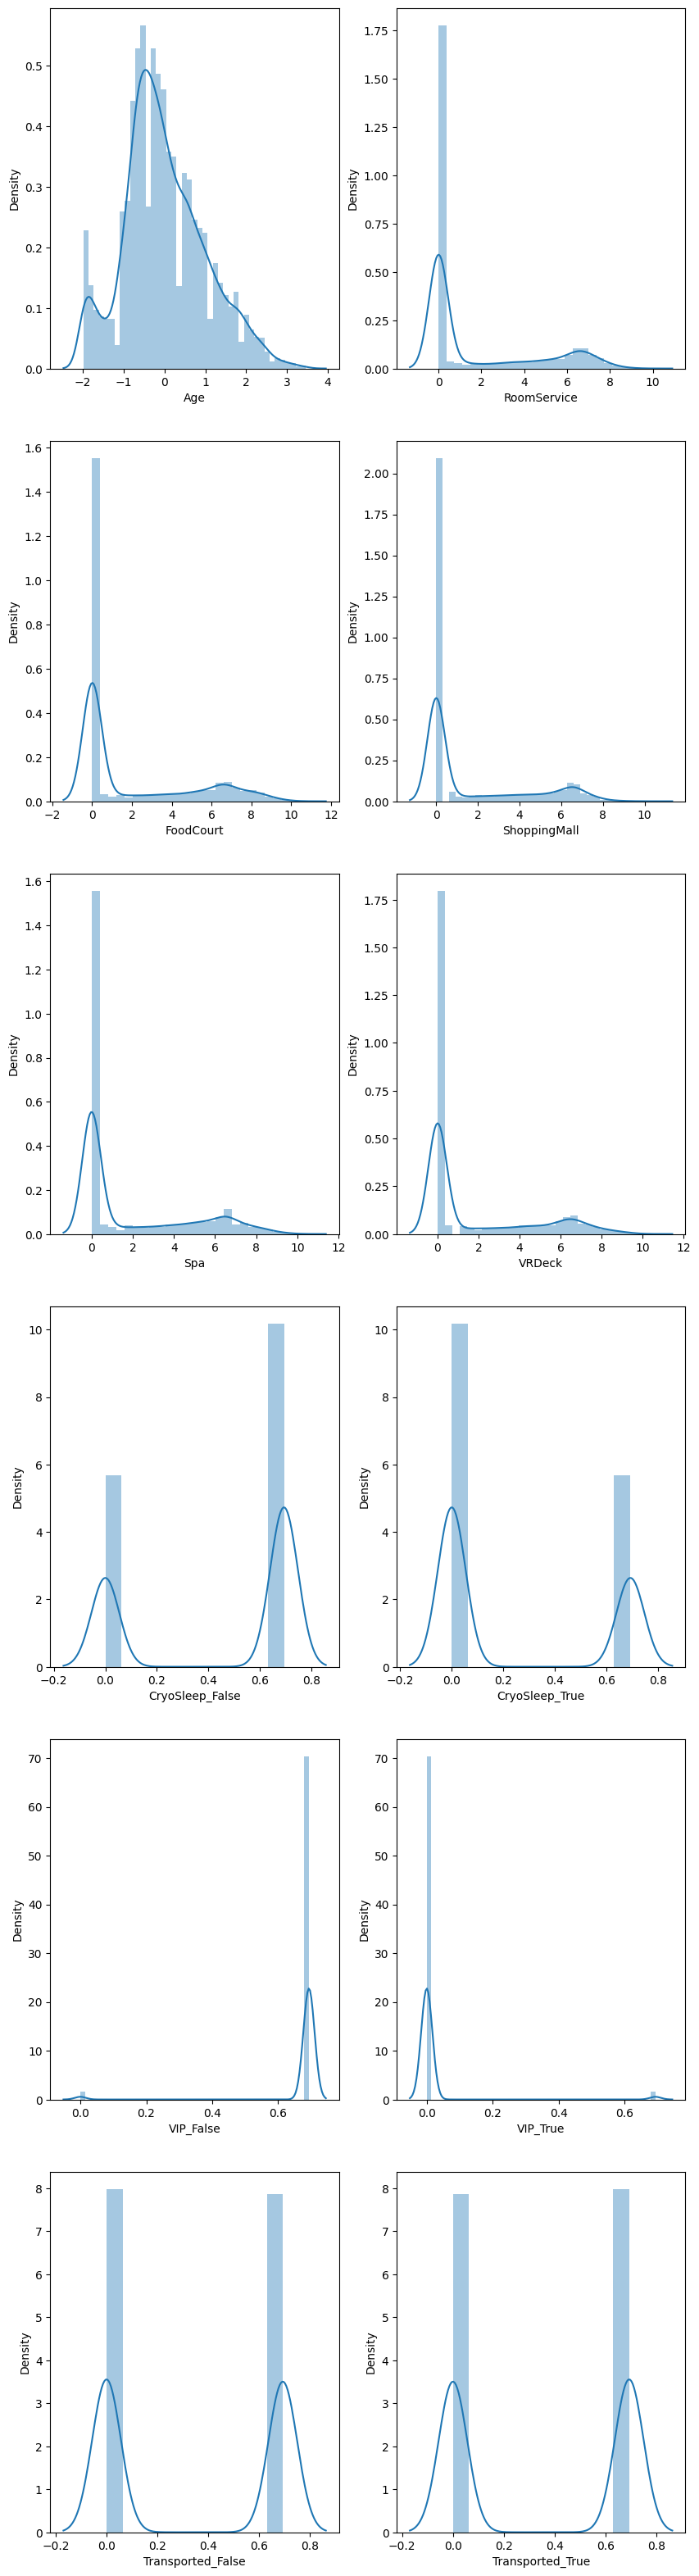

In [83]:
fig, ax = plt.subplots(ncols=2, nrows=6, figsize=(10,40))

sns.distplot(scaled_spaceship['Age'], ax=ax[0,0])
sns.distplot(scaled_spaceship['RoomService'], ax=ax[0,1])
sns.distplot(scaled_spaceship['FoodCourt'], ax=ax[1,0])
sns.distplot(scaled_spaceship['ShoppingMall'], ax=ax[1,1])
sns.distplot(scaled_spaceship['Spa'], ax=ax[2,0])
sns.distplot(scaled_spaceship['VRDeck'], ax=ax[2,1])
sns.distplot(scaled_spaceship['CryoSleep_False'], ax=ax[3,0])
sns.distplot(scaled_spaceship['CryoSleep_True'], ax=ax[3,1])
sns.distplot(scaled_spaceship['VIP_False'], ax=ax[4,0])
sns.distplot(scaled_spaceship['VIP_True'], ax=ax[4,1])
sns.distplot(scaled_spaceship['Transported_False'], ax=ax[5,0])
sns.distplot(scaled_spaceship['Transported_True'], ax=ax[5,1])

In [82]:
scaled_spaceship.to_csv('scaled_spaceship.csv',index=False)

In [84]:
new = pd.read_csv('scaled_spaceship.csv')

In [85]:
new

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,CryoSleep_False,CryoSleep_True,VIP_False,VIP_True,Transported_False,Transported_True,CryoSleep,VIP,Transported
0,0.702706,0.000000,0.000000,0.000000,0.000000,0.000000,0.6934,0.0000,0.6934,0.0000,0.6934,0.0000,False,False,False
1,-0.332151,4.700480,2.302585,3.258097,6.309918,3.806662,0.6934,0.0000,0.6934,0.0000,0.0000,0.6934,False,False,True
2,2.013525,3.784190,8.182280,0.000000,8.812248,3.912023,0.6934,0.0000,0.0000,0.6934,0.6934,0.0000,False,True,False
3,0.288763,0.000000,7.157735,5.918894,8.110728,5.267858,0.6934,0.0000,0.6934,0.0000,0.6934,0.0000,False,False,False
4,-0.884075,5.717028,4.262680,5.023881,6.338594,1.098612,0.6934,0.0000,0.6934,0.0000,0.0000,0.6934,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0.840687,0.000000,8.827615,0.000000,7.404888,4.317488,0.6934,0.0000,0.0000,0.6934,0.6934,0.0000,False,True,False
8689,-0.746094,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.6934,0.6934,0.0000,0.6934,0.0000,True,False,False
8690,-0.194170,0.000000,0.000000,7.535297,0.693147,0.000000,0.6934,0.0000,0.6934,0.0000,0.0000,0.6934,False,False,True
8691,0.219773,0.000000,6.956545,0.000000,5.869297,8.082093,0.6934,0.0000,0.6934,0.0000,0.6934,0.0000,False,False,False
